<a href="https://colab.research.google.com/github/0x6f736f646f/computer-vision-ai-saturdays/blob/master/3rdMonth%7Bdeep_learning%7D/Notebook/03-using-pretrained-net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Pre-Trained Models

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.


In [1]:
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from keras.preprocessing import image
from keras.applications import vgg16, resnet50, inception_v3 

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        ramp_frames = 10
    
        camera = cv2.VideoCapture(0)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [4]:
# img_path = "../Data/webcam_test_img.png"
img_path = "../Data/face.jpeg"
# if save_webcam_image(img_path) is False:
#     # Webcam not active, use the rocking chair Image
#     img_path = "../Data/face.jpeg"
#     print("Using the Test Rocking Chair Image: {}".format(img_path))

In [5]:
!wget https://github.com/JKUATSES/sesBoardv1/raw/main/Design/SESBOARD_Top.png

--2021-07-08 14:35:42--  https://github.com/JKUATSES/sesBoardv1/raw/main/Design/SESBOARD_Top.png
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JKUATSES/sesBoardv1/main/Design/SESBOARD_Top.png [following]
--2021-07-08 14:35:43--  https://raw.githubusercontent.com/JKUATSES/sesBoardv1/main/Design/SESBOARD_Top.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81573 (80K) [image/png]
Saving to: ‘SESBOARD_Top.png.1’

SESBOARD_Top.png.1  100%[===================>]  79.66K  --.-KB/s    in 0.02s   

2021-07-08 14:35:43 (4.96 MB/s) - ‘SESBOARD_Top.png.1’ saved [81573/81573]



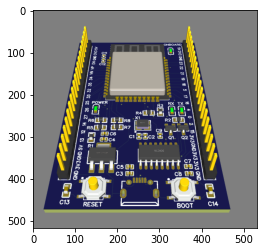

In [6]:
img=cv2.imread('SESBOARD_Top.png')
b,g,r=cv2.split(img)
img_matplotlib=cv2.merge([r,g,b])

plt.imshow(img_matplotlib)

## VGG16 - Pretrained Model

In [7]:
vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [9]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
predict_image(vgg16_model, "SESBOARD_Top.png", vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n03777754,modem,0.446453
1,n03598930,jigsaw_puzzle,0.160831
2,n03492542,hard_disc,0.087222
3,n03584254,iPod,0.068925
4,n04548362,wallet,0.040008
5,n07248320,book_jacket,0.025845
6,n02978881,cassette,0.020937
7,n02992529,cellular_telephone,0.013536
8,n03871628,packet,0.013125
9,n03485407,hand-held_computer,0.012611


## Resnet50 - Pretrained Model

## Inception - Pretrained Model